# Interactive visualisations in python

Southampton Python User Group - February 2018 <br>
nana.abankwa@gmail.com

# Import data to be visualised

In [1]:
import pandas as pd  
import numpy as np

failures = pd.read_csv('failures.csv') # Read csv file using pandas

 - The data shows the results of a simulation which was run 50 times (Almost 1 million rows X 17 column)
 - It contains details on component failures for a system (eg. parts of an aircraft)
 - Columns include run number, failed component type/serial number, location of failure, date of failure


In [2]:
failures

,RunNumber,AnyLogicWorkscopeID,FailureReason,FailedComponentType,CauseCategory,Standard,ComponentSerialNumber,AssetId,AssetType,DiscoverySiteId,AssetSerialNumber,ReasonPriority,CalendarDate,Action,RecoverySiteId,ParentWorkscopeId,FailureModeID
0,Run_01,1115,Primary,COMPONENT_0016,NaN,1,COMPONENT_SN_00016,20001,EQUIPMENT,1,20001,1,2018-07-04 01:03:29,Repair,3,NaN,9
1,Run_01,1525,Primary,COMPONENT_0003,NaN,1,COMPONENT_SN_00003,20001,EQUIPMENT,1,20001,1,2019-10-30 01:26:27,Repair,3,NaN,33
2,Run_01,1631,Primary,COMPONENT_0006,NaN,1,COMPONENT_SN_00006,20001,EQUIPMENT,1,20001,1,2020-01-11 18:57:44,Repair,3,NaN,3
3,Run_01,1747,Primary,COMPONENT_0006,NaN,1,COMPONENT_SN_05142,20001,EQUIPMENT,1,20001,1,2020-05-31 17:19:30,Repair,3,NaN,3
4,Run_01,2281,Primary,COMPONENT_0006,NaN,1,COMPONENT_SN_04326,20001,EQUIPMENT,1,20001,1,2021-08-27 05:05:05,Repair,3,NaN,3
5,Run_01,2594,Primary,COMPONENT_0006,NaN,1,COMPONENT_SN_04446,20001,EQUIPMENT,1,20001,1,2022-07-13 04:41:28,Repair,3,NaN,3
6,Run_01,3033,Primary,COMPONENT_0006,NaN,1,COMPONENT_SN_01422,20001,EQUIPMENT,1,20001,1,2023-07-29 13:26:19,Recondition,3,NaN,3
7,Run_01,3752,Primary,COMPONENT_0006,NaN,1,COMPONENT_SN_03918,20001,EQUIPMENT,1,20001,1,2025-08-08 21:13:45,Repair,3,NaN,3
8,Run_01,1132,Primary,COMPONENT_0006,NaN,1,COMPONENT_SN_00030,20002,EQUIPMENT,1,20002,1,2018-07-17 02:28:18,Repair,3,NaN,3
9,Run_01,1593,Primary,COMPONENT_0006,NaN,1,COMPONENT_SN_05046,20002,EQUIPMENT,1,20002,1,2019-12-16 15:09:43,Repair,3,NaN,3


In [3]:
failures.RunNumber.unique()

array(['Run_01', 'Run_02', 'Run_03', 'Run_04', 'Run_05', 'Run_06',
       'Run_07', 'Run_08', 'Run_09', 'Run_10', 'Run_11', 'Run_12',
       'Run_13', 'Run_14', 'Run_15', 'Run_16', 'Run_17', 'Run_18',
       'Run_19', 'Run_20', 'Run_21', 'Run_22', 'Run_23', 'Run_24',
       'Run_25', 'Run_26', 'Run_27', 'Run_28', 'Run_29', 'Run_30',
       'Run_31', 'Run_32', 'Run_33', 'Run_34', 'Run_35', 'Run_36',
       'Run_37', 'Run_38', 'Run_39', 'Run_40', 'Run_41', 'Run_42',
       'Run_43', 'Run_44', 'Run_45', 'Run_46', 'Run_47', 'Run_48',
       'Run_49', 'Run_50'], dtype=object)

# Python visualisation landscape

Let’s begin by looking out at the wide range of visualisation tools that are out there in the python. A detailed discussion of the landscape by Jake Vanderplas at Pycon 2017 can be viewed at https://www.youtube.com/watch?v=FytuB8nFHPQ

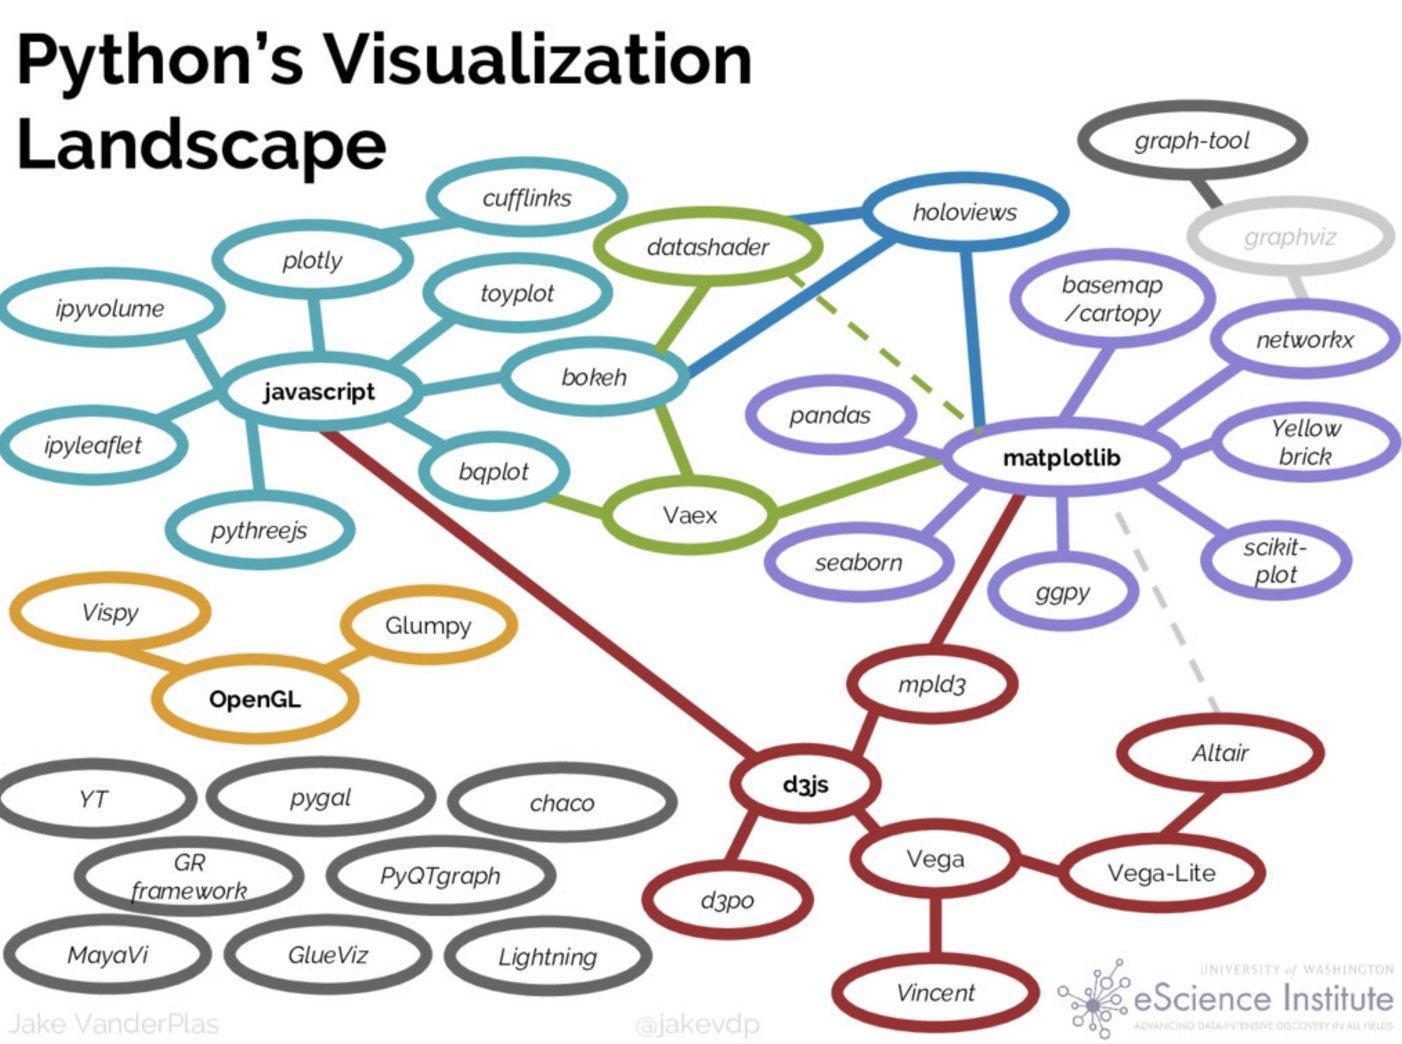

In [4]:
from IPython.display import Image
Image('landscape.jpg') 

- Each of these have their own strengths and weakness.
- Matplotlib is core tool around which tools like seaborn and pandas are built around to create a cluster(new API)
- Some python libraries depend on javascript to create interactive visualisations


# Matplotlib

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (18, 9)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (18, 9)

- Well-tested and might be most used tool
- Designed to be like matlab so transition is easier.
- Can render a lot of visualisation backends
- See gallery online https://matplotlib.org/gallery/index.html

- Doesn’t support interactive visualisations

- As an example let’s create a scatter plot using the failure mode and failure reason column to see if there’s anything interesting 
- We will consider this for only experiment 1/50

Text(0,0.5,'Failure Mode')

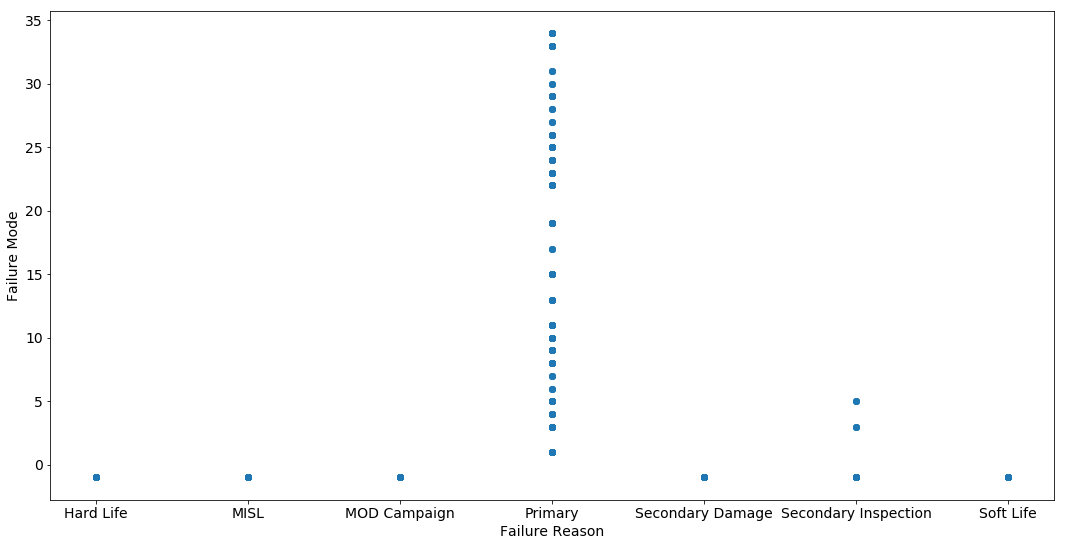

In [7]:
filtered = failures[failures.RunNumber == 'Run_01']

plt.figure()
plt.scatter(x=filtered.FailureReason,y=filtered.FailureModeID)
plt.xlabel('Failure Reason')
plt.ylabel('Failure Mode')

Let’s consider another example. A histogram

Text(0.5,1,'Failure reason histogram')

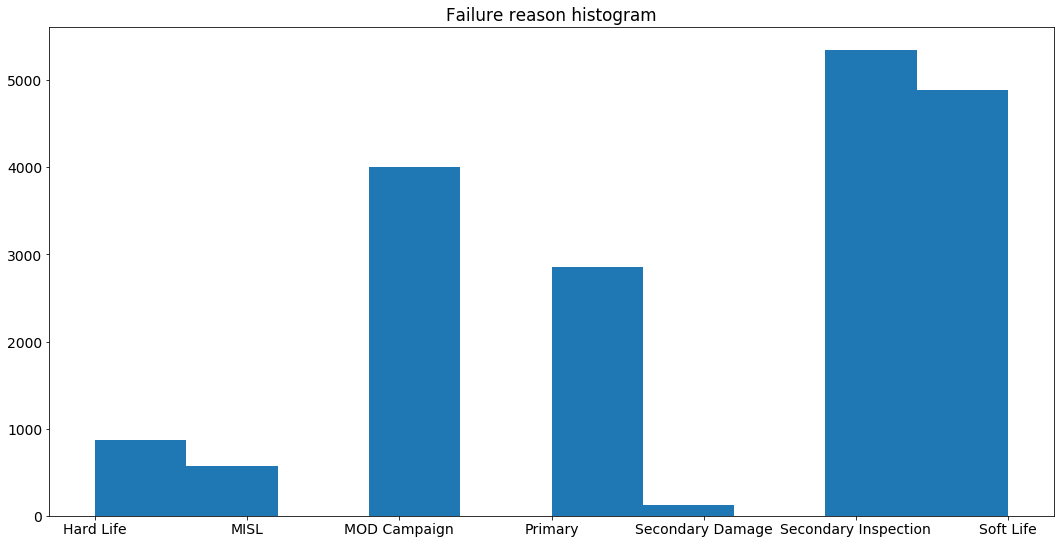

In [8]:
filtered = failures[failures.RunNumber == 'Run_01']

plt.figure()
plt.hist(x=filtered.FailureReason)
plt.title('Failure reason histogram')

We will now create a histogram using pandas

# Pandas

- Pandas is a library for data analysis and manipulation and presents data in structures called dataframes

- Again not interactive


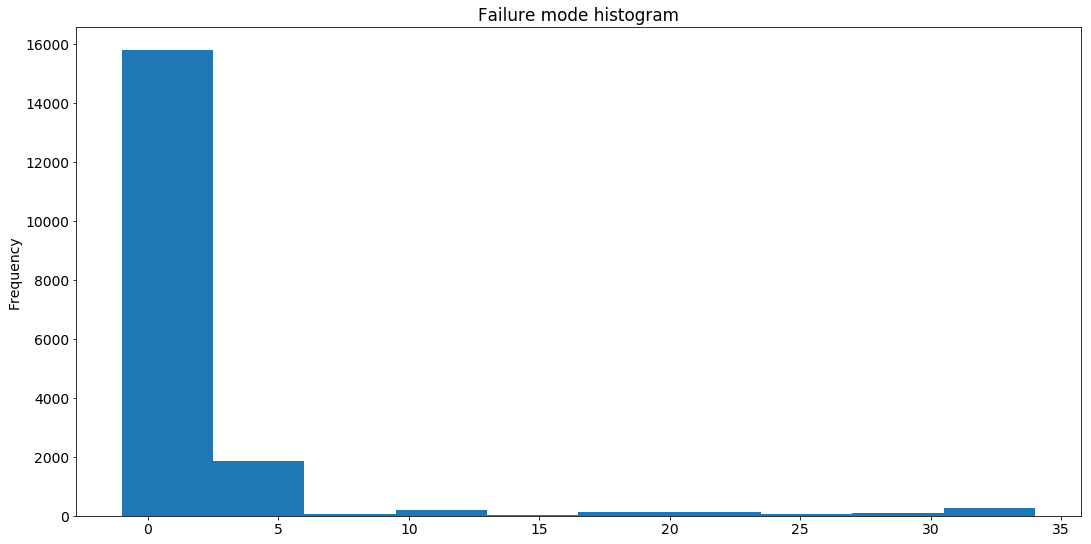

In [9]:
filtered = failures[failures.RunNumber == 'Run_01']

plt.figure()

# PREVIOUSLY
# plt.hist(x=filtered.FailureModeID)
# plt.title('Failure mode histogram')

filtered.FailureModeID.plot(kind='hist',title='Failure mode histogram')

# What about interactivity?

- Most solutions are browser based as almost everyone has a browser.
- Most developed in this cluster are plotly and bokeh
- Both of these have galleries online 
    - Plotly https://plot.ly/python/
    - Bokeh https://bokeh.pydata.org/en/latest/docs/gallery.html

# Plotly

In [10]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

- Open source tool with range of capabilies including. 3d plotting, animations. Python, R, Julia library 
- Figure has 2 components: data and layout
    - Define kind of plot as trace
    - Specify this as data and define layout
- Plot is interactive. 
- Dash can be used to make the plotly figure a web application


In [11]:
filtered = failures[failures.RunNumber == 'Run_01']

# Define trace
trace = go.Histogram(x=filtered.FailureReason)

data=[trace]

layout = go.Layout(title = 'FailureModeID Histogram')

fig = go.Figure(data=data,layout=layout)

py.iplot(fig)

# Dash

In [12]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

Chris Par's Scipy 2017 talk gives an introduction to dash https://www.youtube.com/watch?v=sea2K4AuPOk

- Open source framework for building custom web user applications in pure python.
- All interactivity is completely customised
- We will reproduce the histogram in dash


- 2 parts of dash application
    - 1: describes app layout. eg. Header, markdown, graph component. 2 component libraries (dash html components==python abstraction for html, images, tables, etc). Dash core components(dropdowns, graphs)
    - 2: interactivity component with how inputs affect outputs. Done through callback
- First we use only the app layout to recreate histogram
- Similar results as before but in own webpage not notebook
- Like before we focus on just run 1
- Add some styling next


In [13]:
filtered = failures[failures.RunNumber == 'Run_01']

# Start dash application
app = dash.Dash()

# Application layout
app.layout = html.Div(
    children=[
        html.H1('Dash application'),
        
        html.Div('''Dash: A web application framework for Python.'''),
        
        dcc.Graph(
            id='histogram',
            figure={
                'data': [go.Histogram(x=filtered.FailureReason)],
                'layout': go.Layout(
                    title = 'Histogram',
                )
            }
        )
    ]
)

# Run server
if __name__ == '__main__':
    app.run_server(debug=False, host='0.0.0.0')

 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Feb/2018 18:11:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:11:13] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:11:13] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:11:13] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:23:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:23:59] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:23:59] "GET /_dash-dependencies HTTP/1.1" 200 -


## Add some styling 

In [14]:
filtered = failures[failures.RunNumber == 'Run_01']

app = dash.Dash()

app.layout = html.Div(
    children=[
        html.H1('Dash application'),
        
        html.Div('''Dash: A web application framework for Python.'''),
        
        dcc.Graph(
            id='histogram',
            figure={
                'data': [go.Histogram(x=filtered.FailureReason)],
                'layout': go.Layout(
                    title = 'Histogram',
                    paper_bgcolor='rgb(243, 243, 243)',
                    titlefont=dict(size='18'),
                    xaxis=dict(
                    title='Failure reasons',
                    titlefont=dict(
                        family='Arial, sans-serif',
                        size=18,
                        color='lightgrey'),
                    tickfont=dict(
                        family='Old Standard TT, serif',
                        size=14,
                        color='black'),
                     )
                )
            }
        )
    ]
)

if __name__ == '__main__':
    app.run_server(debug=False, host='0.0.0.0')

 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Feb/2018 18:25:02] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:25:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:25:02] "GET /_dash-dependencies HTTP/1.1" 200 -


## Filter by run number

- We want the user to be able to not only zoom in but also select run number
- Add dropdown component populated with unique values from runnumber column with unique id
- Create callback with 1 input updating 1 output
- In this case the dropdown input is used to filter the dataframe


In [15]:
app = dash.Dash()

app.layout = html.Div(
    children=[
        html.H1('Dash application'),
        
        html.Div('''Dash: A web application framework for Python.'''),
        
        html.Div(
            children=[
                html.P('Filter by Run Number',
                       style={'display': 'inline-block'}),
                # Run number dropdown
                dcc.Dropdown(
                    id='runnumber-dropdown',
                    options=
                    [
                        {'label': run_number,
                         'value': run_number}
                        for run_number in np.sort(failures.RunNumber.unique())
                    ],
                    multi=True,
                    value=['Run_15'])
            ],
        ),
        
        dcc.Graph(id='histogram',)
    ]
)

@app.callback(Output('histogram','figure'),
              [Input('runnumber-dropdown','value')])
def update_graph(runnumber):
    filtered = failures[failures.RunNumber.isin(runnumber)]
    
    figure={
                'data': [go.Histogram(x=filtered.FailureReason)],
                'layout': go.Layout(title = 'Histogram',)
            }
    return figure
    

if __name__ == '__main__':
    app.run_server(debug=False, host='0.0.0.0')

 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Feb/2018 18:28:21] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:21] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:22] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:35] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:28:37] "POST /_dash-update-component H

## Add selector for choosing mode or reason

- We can also use multiple inputs to update a single output
- We want to select run and then choose whether to view failure mode or failure reason. Add button to select mode or reason
- Use failure selector as second input
- Similar to before but this time we have an if statement to control whether we see failure mode or failure reason

In [ ]:
app = dash.Dash()

app.layout = html.Div(
    children=[
        html.H1('Dash application'),
        
        html.Div('''Dash: A web application framework for Python.'''),
        
        html.Div(
            children= 
            [
                html.Div(
                    children=
                    [
                        html.P('Filter by Run Number',
                               style={'display': 'inline-block'}),
                    # Run number dropdown
                        dcc.Dropdown(
                            id='runnumber-dropdown',
                            options=
                            [
                                {'label': run_number,
                                 'value': run_number}
                                for run_number in np.sort(failures.RunNumber.unique())
                            ],
                            multi=True,
                            value=['Run_15'])
                    ],
                    className='four columns'),
            
                html.Div(
                    children=
                    [
                        html.P('Select Failure Graph', 
                               style={'display': 'inline-block'}),
                        # Button
                        dcc.RadioItems(
                            id='failure-selector',
                            options=
                            [
                                {'label': 'Reason for Failure ', 'value': 'reason'},
                                {'label': 'Failure Mode', 'value': 'mode'}
                            ],
                            value='reason',
                            labelStyle={'display': 'inline-block'}),
                    ],
                    className='four columns'),
            ],
            className='row'),
    
        dcc.Graph(id='histogram',)
    ]
)

@app.callback(Output('histogram','figure'),
              [Input('runnumber-dropdown','value'),
               Input('failure-selector','value')])
def update_graph(runnumber,f_select):
    filtered = failures[failures.RunNumber.isin(runnumber)]
    
    if f_select == 'reason':
        figure={
                    'data': [go.Histogram(x=filtered.FailureReason)],
                    'layout': go.Layout(title = 'Histogram',)
                }
        return figure
    else:
        figure={
                    'data': [go.Histogram(x=filtered.FailureModeID)],
                    'layout': go.Layout(title = 'Histogram',)
                }
        return figure
    

if __name__ == '__main__':
    app.run_server(debug=False, host='0.0.0.0')

 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Feb/2018 18:32:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:31] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:31] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:32] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:32:47] "POST /_dash-update-component H

## Explore component types of a particular failure reason over time


Let’s take it one step further and use multiple outputs with multiple inputs.

Second graph to focus on particular failure reasons and their component type but also be able to change what we plot on each axis. 

- 3 dropdowns
    - 1 dropdown for cause of failure using unique values from a single column
    - 2 dropdows to select what to use as axis (from columns in dataframe) 

- Add second callback for new figure adding 3 new dropdowns as inputs 


In [ ]:
app = dash.Dash()
app.css.append_css({'external_url': 'https://cdn.rawgit.com/plotly/dash-app-stylesheets/2d266c578d2a6e8850ebce48fdb52759b2aef506/stylesheet-oil-and-gas.css'})

app.layout = html.Div(
    children=[
        html.H1('Dash application'),
        
        html.Div('''Dash: A web application framework for Python.'''),
        
        # Filters
        html.Div(
            children= 
            [
                html.Div(
                    children=
                    [
                        html.P('Filter by Run Number',
                               style={'display': 'inline-block'}),
                    # Run number dropdown
                        dcc.Dropdown(
                            id='runnumber-dropdown',
                            options=
                            [
                                {'label': run_number,
                                 'value': run_number}
                                for run_number in np.sort(failures.RunNumber.unique())
                            ],
                            multi=True,
                            value=['Run_15'])
                    ],
                    className='four columns'),
            
                html.Div(
                    children=
                    [
                        html.P('Failure Graphs', 
                               style={'display': 'inline-block'}),
                        # Button
                        dcc.RadioItems(
                            id='failure-selector',
                            options=
                            [
                                {'label': 'Reason for Failure ', 'value': 'reason'},
                                {'label': 'Failure Mode', 'value': 'mode'}
                            ],
                            value='reason',
                            labelStyle={'display': 'inline-block'}),
                    ],
                    className='four columns'),
            ],
            className='row'),
    
        dcc.Graph(id='histogram',),
        
        # Heading Filters
        html.Div(
            [
                html.Div(
                    [
                        html.H4('Focus on specific failure reasons')
                    ],
                    className='six columns'),
                html.Div(
                    [
                        html.P('Select cause of failure',
                               style={'display': 'inline-block'}),
                        # Engine Dropdown
                        dcc.Dropdown(
                            id='failure_reason',
                            options=
                            [
                                {'label': col,
                                 'value': col}
                                for col in failures.CauseCategory.unique()
                            ],
                            multi=True,
                            value=['Primary Planned module caused'])
                    ],
                    className='two columns'),
                html.Div(
                    [
                        html.P('Select X-axis',
                               style={'display': 'inline-block'}),
                        # Engine Dropdown
                        dcc.Dropdown(
                            id='x_failure',
                            options=
                            [
                                {'label': col,
                                 'value': col}
                                for col in np.sort(failures.columns)
                            ],
                            multi=False,
                            value='CalendarDate')
                    ],
                    className='two columns'),
                html.Div(
                    [
                        html.P('Select Y-axis',
                               style={'display': 'inline-block'}),
                        # Engine Dropdown
                        dcc.Dropdown(
                            id='y_failure',
                            options=
                            [
                                {'label': col,
                                 'value': col}
                                for col in np.sort(failures.columns)
                            ],
                            multi=False,
                            value='FailedComponentType')
                    ],
                    className='two columns'),
            ],
            className='row',
            style={'margin-bottom': '10'}
        ),
        
        # failure_over_time graph
        html.Div([
            
                html.Div(
                    [
                        dcc.Graph(id='failure_over time'),
                    ],
                    className='eleven columns',
                    style={'margin-top': '10'}),

            ], 
            className="row ",
            style={'margin-bottom': '10'}
        ),
    ]
)

@app.callback(Output('histogram','figure'),
              [Input('runnumber-dropdown','value'),
               Input('failure-selector','value')])
def update_graph(runnumber,f_select):
    filtered = failures[failures.RunNumber.isin(runnumber)]
    
    if f_select == 'reason':
        figure={
                    'data': [go.Histogram(x=filtered.FailureReason)],
                    'layout': go.Layout(title = 'Histogram',)
                }
        return figure
    else:
        figure={
                    'data': [go.Histogram(x=filtered.FailureModeID)],
                    'layout': go.Layout(title = 'Histogram',)
                }
        return figure

    
@app.callback(Output('failure_over time','figure'),
              [Input('runnumber-dropdown','value'),
               Input('failure_reason','value'),
               Input('x_failure','value'),
               Input('y_failure','value'),])
def update_graph(runnumber,cause,x_axis,y_axis):
    filtered = failures.sort_values(by=["FailedComponentType"])[
        (failures.RunNumber.isin(runnumber)) &
        (failures.CauseCategory.isin(cause))]
    
    trace = go.Scatter(
        x=filtered[x_axis],
        y=filtered[y_axis],
        mode='markers',
        text = ('WorkscopeID: ' + filtered.AnyLogicWorkscopeID.astype(str) + ' ,' + '<br>' +
            filtered.ComponentSerialNumber.astype(str) + ' ,' + '<br>' + 
            filtered.AssetSerialNumber.astype(str) + ' ,' + '<br>' + 
            filtered.AssetId.astype(str) + ' ,' + '<br>' +
            'Site: ' + filtered.DiscoverySiteId.astype(str) + ' ,' + '<br>'),
        marker=dict(
            size=4,
            #color=filtered.FailureModeID,                # set color to an array/list of desired values
            #colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )
                                    
    data = [trace]
    
    layout = go.Layout(
        autosize=True,
        title = 'Initial Failures',
        legend=dict(font=dict(size=10), orientation='h'),
        height=550, 
        margin=dict(b=100, r=50, l=70, t=50),
        plot_bgcolor='rgb(243, 243, 243)',
        paper_bgcolor='rgb(243, 243, 243)',
        titlefont=dict(size='14'),
        hovermode='closest',
    )
    
    fig = go.Figure(data=data, layout=layout)
    return fig

if __name__ == '__main__':
    app.run_server(debug=False, host='0.0.0.0')

 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Feb/2018 18:39:26] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:39:26] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:39:26] "GET / HTTP/1.1" 200 -
/Users/Nana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:164: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

127.0.0.1 - - [28/Feb/2018 18:39:29] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:39:29] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:39:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:39:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:39:39] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:39:39] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2018 18:39:43] "POST /_dash-update-component HTTP/1.1" 20

# Sharing and deploying application

- Underlying server in dash is flask 
- Deployed just how flask application is deployed.


- Tools like heroku, secure tunnel, ngrok can be used. See http://flask.pocoo.org/docs/0.12/deploying/

Other Interesting tools
- Pivottable js
- IBM Pixiedust

# Pivot Table js

In [ ]:
# from pivottablejs import pivot_ui
# pivot_ui(failures)

# PixieDust

In [ ]:
# import pixiedust

In [ ]:
# display(failures)